# Model vs Observations

## Import Needed Libraries

In [ ]:
%matplotlib inline
#import needed modules to plot data
import numpy as np
import pandas as pd
import csv
import xarray as xr
import csv
import datetime
from scipy import stats
import matplotlib.dates as mdates
#import cartopy.crs as ccrs
# from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script
# type(WhGrYlRd)  # our custom colormap

In [ ]:
#Upload baseline ATM Hg at Chacaltaya
ds_baseCHC=xr.open_mfdataset('/net/fs03/d1/tzd/RAworkflow/GCrun/baseMDD/merra2_2x25_Hg/OutputDir/GEOSChem.SpeciesConcCHC.201*.nc4',
                             concat_dim=['time'], combine='nested')

In [ ]:
#Upload ATM Hg at Chacaltaya after 2x emission increase in MDD
ds_CHC_mdd=xr.open_mfdataset('/net/fs03/d1/tzd/RAworkflow/GCrun/2xMDD/merra2_2x25_Hg/OutputDir/GEOSChem.SpeciesConcCHC.201*.nc4',
                             concat_dim=['time'], combine='nested')

In [ ]:
#Upload ATM Hg at Chacaltaya after 2x emission increase in Arequipa
ds_CHC_aqp=xr.open_mfdataset('/net/fs03/d1/tzd/RAworkflow/GCrun/aqp_updated/merra2_2x25_Hg/OutputDir/GEOSChem.SpeciesConcCHC.201*.nc4',
                             concat_dim=['time'], combine='nested')

In [ ]:
#Upload ATM Hg at Chacaltaya after 2x emission increase in South Puno
ds_CHC_Spuno=xr.open_mfdataset('/net/fs03/d1/tzd/RAworkflow/GCrun/Puno/SouthPuno_C/merra2_2x25_Hg/OutputDir/GEOSChem.SpeciesConcCHC.201*.nc4',
                             concat_dim=['time'], combine='nested')

In [ ]:
#Upload ATM Hg at Chacaltaya after 2x emission increase in North Puno
ds_CHC_Npuno=xr.open_mfdataset('/net/fs03/d1/tzd/RAworkflow/GCrun/Puno/merra2_2x25_Hg/OutputDir/GEOSChem.SpeciesConcCHC.201*.nc4',
                             concat_dim=['time'], combine='nested')

In [ ]:
#Upload ATM Hg at Chacaltaya after 2x emission increase in Apurímac
ds_CHC_aprc=xr.open_mfdataset('/net/fs03/d1/tzd/RAworkflow/GCrun/150percent_MDD_emit/merra2_2x25_Hg/OutputDir/GEOSChem.SpeciesConcCHC.201*.nc4',
                             concat_dim=['time'], combine='nested')


### sanity check

In [ ]:
ds_baseCHC

<xarray.Dataset>
Dimensions:          (time: 17520, lev: 20, ilev: 21, lat: 1, lon: 1)
Coordinates:
  * time             (time) datetime64[ns] 2014-01-01T00:30:00 ... 2015-12-31...
  * lev              (lev) float64 0.9925 0.9775 0.9625 ... 0.6875 0.6563 0.6188
  * ilev             (ilev) float64 1.0 0.985 0.97 0.955 ... 0.675 0.6375 0.6
  * lat              (lat) float64 -16.0
  * lon              (lon) float64 -67.5
Data variables:
    hyam             (time, lev) float64 dask.array<chunksize=(744, 20), meta=np.ndarray>
    hybm             (time, lev) float64 dask.array<chunksize=(744, 20), meta=np.ndarray>
    hyai             (time, ilev) float64 dask.array<chunksize=(744, 21), meta=np.ndarray>
    hybi             (time, ilev) float64 dask.array<chunksize=(744, 21), meta=np.ndarray>
    P0               (time) float64 1e+03 1e+03 1e+03 ... 1e+03 1e+03 1e+03
    AREA             (time, lat, lon) float32 dask.array<chunksize=(744, 1, 1), meta=np.ndarray>
    SpeciesConc_HgP  (time, lev, lat, lon) float32 dask.array<chunksize=(744, 20, 1, 1), meta=np.ndarray>
    SpeciesConc_Hg2  (time, lev, lat, lon) float32 dask.array<chunksize=(744, 20, 1, 1), meta=np.ndarray>
    SpeciesConc_Hg0  (time, lev, lat, lon) float32 dask.array<chunksize=(744, 20, 1, 1), meta=np.ndarray>
Attributes:
    title:                           GEOS-Chem diagnostic collection: Species...
    history:                         
    format:                          CFIO
    conventions:                     COARDS
    ProdDateTime:                    
    reference:                       www.geos-chem.org; wiki.geos-chem.org
    contact:                         GEOS-Chem Support Team (geos-chem-suppor...
    simulation_start_date_and_time:  2014-01-01 00:00:00z
    simulation_end_date_and_time:    2016-01-01 00:00:00z

## Get Keys

In [ ]:
#get the geoschem variable names 
for item in ds_baseCHC.keys():
    
    dic=ds_baseCHC[item].attrs
    res = [item] 
    for key in dic.keys() : 
        res.append(dic[key]) 
    #print(res)
    #Cat_m.append(res)

# Set up Model runs

In [ ]:
# BASE MDD
Hg0 = ds_baseCHC.SpeciesConc_Hg0.isel(lev = 19).squeeze() # subset for level

In [ ]:
# Modified Model Outputs 
Hg0_mdd   = ds_CHC_mdd.SpeciesConc_Hg0.isel(lev = 19).squeeze() # subset for level
Hg0_aqp   = ds_CHC_aqp.SpeciesConc_Hg0.isel(lev = 19).squeeze()
Hg0_Spuno = ds_CHC_Spuno.SpeciesConc_Hg0.isel(lev = 19).squeeze()
Hg0_Npuno = ds_CHC_Npuno.SpeciesConc_Hg0.isel(lev = 19).squeeze()
Hg0_aprc  = ds_CHC_aprc.SpeciesConc_Hg0.isel(lev = 19).squeeze()

In [ ]:
# convert units to ng m^-3
def units_conv():
    R = 8.314462 # m^3 Pa K^-1 mol ^-1
    MW_Hg = 200.59 # g mol^-1
    ng_g = 1e9 # ng/g

    stdpressure = 101325 # Pascals
    stdtemp = 273.15 # Kelvins

    unit_conv = stdpressure / R / stdtemp * MW_Hg * ng_g # converter from vmr to ng m^-3
    return unit_conv

Hg0 = Hg0 * units_conv()
Hg0_mdd = Hg0_mdd * units_conv()
Hg0_aqp = Hg0_aqp * units_conv()
Hg0_Spuno = Hg0_Spuno * units_conv()
Hg0_Npuno = Hg0_Npuno * units_conv()
Hg0_aprc  = Hg0_aprc * units_conv()

In [ ]:
def getLoRes(start,end):
    Hg0_Lres = xr.open_dataset('/net/fs03/d1/tzd/RAworkflow/GCrun/baseMDD/merra2_2x25_Hg/OutputDir/GEOSChem.SpeciesConcBaseHeigt_levels.nc4')
    Hg0_Lres=Hg0_Lres.where((Hg0_Lres.lon==-67.5) & (Hg0_Lres.lat==-16.0), drop=True).to_dataframe().reset_index() 
    Hg0_Lres = Hg0_Lres.drop(['height','lat','lon','ps'],axis=1)
    Hg0_Lres['time']=pd.to_datetime(Hg0_Lres['time'],utc=True,format='%Y%m%d', errors='ignore').dt.date
    Hg0_Lres = Hg0_Lres.set_index('time',drop=True)
    Hg0_Lres.index = pd.to_datetime(Hg0_Lres.index)
    Hg0_Lres=Hg0_Lres.loc[start:end]
    return Hg0_Lres*units_conv()#Hg0_Lres.iloc[:-1 , :]*units_conv()

In [ ]:
# getLoRes(start_dt,end_dt)

# Function to extract Hg0 at model grid boxes

In [ ]:
"""
Created on Fri May  7 14:24:42 2021
Extract Hg0 at model grid boxes for comparison with observations
@author: arifeinberg
"""
#%%
import xarray as xr
import os
from os import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

# /net/fs03/d0/arifein/python/GEOS-Chem_runs/run0003/OutputDir

#%%
os.chdir('/net/fs03/d0/arifein/python/')
#%%
def get_model_ts(site_str): # get model time series
    # first check if site files exist
    pn1 = '../GEOS-Chem_runs/run0003/OutputDir/' # path of BASE simulation
    pn2 = '../GEOS-Chem_runs/run0004/OutputDir/' # path of ASGM simulation
    fn  = 'GEOSChem.SpeciesConc' + site_str + '.alltime_d.nc4' # time series at site
    
    bool_exists = path.exists(pn1 + fn) # boolean to check if exists
    if not bool_exists :
        print('Error with filename or site string incorrect')
        return
    
    # continue with extracting model data
    ds1 = xr.open_dataset(pn1 + fn) # BASE simulation
    ds2 = xr.open_dataset(pn2 + fn) # ASGM simulation
    
    if site_str == 'CHC' : # CHC altitude is close to GEOS-Chem level 20
        # BASE
        Hg0 = ds1.SpeciesConc_Hg0.isel(lev = 19).squeeze() # subset for level
        # ASGM        
        Hg0_ASGM = ds2.SpeciesConc_Hg0.isel(lev = 19).squeeze() # subset for level
    elif site_str == 'TIT' : # TIT altitude is close to GEOS-Chem level 15
        # BASE
        Hg0 = ds1.SpeciesConc_Hg0.isel(lev = 14).squeeze() # subset for level
        # ASGM    
        Hg0_ASGM = ds2.SpeciesConc_Hg0.isel(lev = 14).squeeze() # subset for level            
    else : # assume that all other sites are at the surface
        # BASE
        Hg0 = ds1.SpeciesConc_Hg0.isel(lev = 0).squeeze()
        # ASGM        
        Hg0_ASGM = ds2.SpeciesConc_Hg0.isel(lev = 0).squeeze() # subset for level
        
    # convert units to ng m^-3
    R = 8.314462 # m^3 Pa K^-1 mol ^-1
    MW_Hg = 200.59 # g mol^-1
    ng_g = 1e9 # ng/g
    
    stdpressure = 101325 # Pascals
    stdtemp = 273.15 # Kelvins
    
    unit_conv = stdpressure / R / stdtemp * MW_Hg * ng_g # converter from vmr to ng m^-3
    
    Hg0 = Hg0 * unit_conv
    Hg0_ASGM = Hg0_ASGM * unit_conv
    
    # calculate contribution from ASGM
    Hg0_c_ASGM = Hg0 - Hg0_ASGM # contribution from ASGM emissions
        
    # return both time series
    return Hg0, Hg0_c_ASGM

# Function to get observations at CHC

In [ ]:
def get_chc_obs(source): # get observations for Chacaltaya
    chc_raw= pd.read_csv(source,delimiter = ";")
    #The first 35 rows of the csv file is descriptive information
    chc = chc_raw.iloc[35:]

    #Reset the index
    chc.reset_index(inplace= True, drop =True)

    #rename columns appropriately
    chc.columns =['tstamp','value']

    #drop NA values in the dataframe
    chc = chc[chc['value'].notna()]
    chc.reset_index(inplace= True, drop =True)
    chc
    #change concentrations to floating point since they are currently strings
    conc=[]
    for index, dat in enumerate(chc['value']):
        num = dat.split(",")
        if len(num)!=2:
            conc.append(float(dat))
        else:
            conc.append(float(num[0]+"."+num[1]))
    chc['value'] = conc

    # Convert that column into a datetime datatype
    chc['tstamp'] = pd.to_datetime(chc['tstamp'],dayfirst=True,utc=True) 

    chc.index = chc['tstamp'] # Set the datetime column as the index
   
    return chc

# Function to Get Observations from GMOS sites except CHC

In [ ]:
def get_data(station):#BAR,CAL,CST, MAN,NIK, SIS
    #convert string to uppercase just incase the case is different 
    station = str(station.upper())
    #create dictionary for file path
    sites = {'BAR':'Bariloche/BAR.csv', 'CAL':'Calhau/CAL.csv','CST':'Celestun/CST.csv','MAN':'Manaus/MAN.csv','NIK':'Niew Nickerie/NIK.csv','SIS':'Sisal/SIS.csv' }
    
    #check if given name is in the list of sites
    if station.upper() in ['BAR','CAL','CST', 'MAN','NIK','SIS']:
        #create function to upload the data from svante
        def get_site(station):
            source='../../../d1/tzd/GMOS_Observations/GMOS_Observations/'+sites[station]
            site= pd.read_csv(source)
            return site
        
  #get required columns from the raw data
        time= get_site(station)['tstamp']
        value= get_site(station)['value']
        unit = get_site(station)['uom']
        
        return pd.concat([time,value,unit], axis=1)# return a data frame with the timestamp, value and units of measurement
    else:# error message if user enter the wrong name that is not any of the sites 
        return "Please try again, use either one of the following 'BAR','CAL','CST', 'MAN','NIK', 'SIS' "
    

# Function that combines functions that get observations

In [ ]:
def get_obs_ts(site_str):
    #check if it is Chacaltaya:
    if site_str == 'CHC' : # different file formate for Chacaltaya
        #Location of data in Svante
        path14 ='../../../d1/tzd/GMOS_Observations/2014/L1_TGM_CHC_2014.csv'
        path15 ='../../../d1/tzd/GMOS_Observations/2015/L1_TGM_CHC_2015.csv'
        # combine data from the two years
        obs_Hg0 =  pd.concat([get_chc_obs(path14), get_chc_obs(path15)], axis=0)
        # convert to datetime
        obs_Hg0['tstamp'] = pd.to_datetime(obs_Hg0['tstamp'],dayfirst=True)
    elif site_str == 'BAR':
        bariloche_df=get_data('BAR')
        df_bar_abv0=bariloche_df[bariloche_df['value']>0]
        df_bar_les5= df_bar_abv0[df_bar_abv0['value']<1.2]
        df_bar_les5['tstamp']=pd.to_datetime(df_bar_les5['tstamp'],dayfirst=True)
        obs_Hg0=df_bar_les5
    elif site_str == 'MAN':
        df_man=get_data('MAN')
        df_man=df_man[df_man['value']>0]
        df_man=df_man[df_man['value']<1.55]
        df_man['tstamp']=pd.to_datetime(df_man['tstamp'],dayfirst=True)
        obs_Hg0=df_man
    else:
        obs_Hg0 = get_data(site_str)
    
    return obs_Hg0       

<AxesSubplot:>

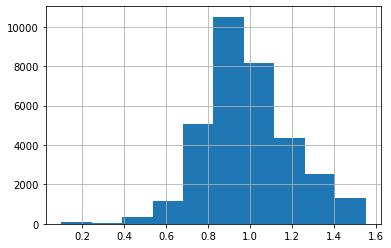

In [ ]:
df_man=get_data('MAN')
df_man=df_man[df_man['value']>0]
df_man=df_man[df_man['value']<1.55]
df_man['value'].hist()

In [ ]:
df_man

,tstamp,value,uom
23,2013-01-30T17:40:00,1.051,ng_m-3
24,2013-01-30T17:50:00,1.043,ng_m-3
25,2013-01-30T18:00:00,1.057,ng_m-3
26,2013-01-30T18:10:00,1.049,ng_m-3
27,2013-01-30T18:20:00,1.048,ng_m-3
...,...,...,...
35999,2014-12-28T13:05:00,1.175,ng_m-3
36000,2014-12-28T13:10:00,1.071,ng_m-3
36001,2014-12-28T13:15:00,1.111,ng_m-3
36002,2014-12-28T13:20:00,1.025,ng_m-3


In [ ]:
# df_man['tstamp']=pd.to_datetime(df_man['tstamp'],dayfirst=True)
# df_man.set_index('tstamp').resample('D').mean().plot(f)

# Function for getting model output and observations 

In [ ]:
def get_model_obs(site_str): #get model and observation data
    # model data
    model_Hg0, model_Hg0_ASGM = get_model_ts(site_str)
    # observation data
    obs_Hg0 = get_obs_ts(site_str)

    return obs_Hg0, model_Hg0.to_dataframe(), model_Hg0_ASGM.to_dataframe()

## Sanity Check

In [ ]:
obs_Hg0, model_Hg0, model_Hg0_ASGM = get_model_obs('MAN')
print('Observations')
print(obs_Hg0.head(5))
print('\nRefference Simulation')
print(model_Hg0.head(5))
print('\nASGM Simulation')
print(model_Hg0_ASGM.head(5))

Observations
                tstamp  value     uom
23 2013-01-30 17:40:00  1.051  ng_m-3
24 2013-01-30 17:50:00  1.043  ng_m-3
25 2013-01-30 18:00:00  1.057  ng_m-3
26 2013-01-30 18:10:00  1.049  ng_m-3
27 2013-01-30 18:20:00  1.048  ng_m-3

Refference Simulation
                      lon  lat     lev  SpeciesConc_Hg0
time                                                   
2010-01-01 12:00:00 -60.0 -2.0  0.9925         1.433826
2010-01-02 12:00:00 -60.0 -2.0  0.9925         1.449618
2010-01-03 12:00:00 -60.0 -2.0  0.9925         1.408010
2010-01-04 12:00:00 -60.0 -2.0  0.9925         1.345133
2010-01-05 12:00:00 -60.0 -2.0  0.9925         1.295935

ASGM Simulation
                      lon  lat     lev  SpeciesConc_Hg0
time                                                   
2010-01-01 12:00:00 -60.0 -2.0  0.9925         0.026747
2010-01-02 12:00:00 -60.0 -2.0  0.9925         0.076139
2010-01-03 12:00:00 -60.0 -2.0  0.9925         0.100712
2010-01-04 12:00:00 -60.0 -2.0  0.9925         

# Create function to prepare the data for making plots 

In [ ]:
def prep_plot(site):
    
   # Call function with site name
    sitenm = site #BAR,CAL,CST, MAN,NIK, SIS, CHC
    obs_Hg0, model_Hg0, model_Hg0_ASGM = get_model_obs(sitenm)
  
        
    #resample observations so that they are daily values
    obs_Hg0['value'] = obs_Hg0['value'].mask(obs_Hg0['value']<0) #missing values
    obs_Hg0['tstamp'] = pd.to_datetime(obs_Hg0['tstamp'])
    obs_Hg0_d = obs_Hg0.set_index('tstamp').resample('D').mean() #daily mean values, ignoring NaN
    obs_Hg0_d.index=pd.to_datetime(obs_Hg0_d.index.date)

    start = str(obs_Hg0['tstamp'].iloc[0])
    end =str(obs_Hg0['tstamp'].iloc[-1])
    if sitenm== 'CHC':
        start=start.split('+')[0]
        end=end.split('+')[0]
    
    #df['time'] = pd.to_datetime(df['time']).dt.date
    #Tmodel=model_Hg0.to_dataframe().loc[start:end]['SpeciesConc_Hg0']
    Tmodel=model_Hg0.loc[start:end]['SpeciesConc_Hg0']
    Tmodel.index=pd.to_datetime(Tmodel.index.date)
    #Amodel = model_Hg0_ASGM.to_dataframe().loc[start:end]['SpeciesConc_Hg0']
    Amodel = model_Hg0_ASGM.loc[start:end]['SpeciesConc_Hg0']
    Amodel.index=pd.to_datetime(Amodel.index.date)
    
    return obs_Hg0_d, Tmodel, Amodel


## Sanity Check

In [ ]:
model_Hg0.index=model_Hg0.index.date
model_Hg0

,lon,lat,lev,SpeciesConc_Hg0
2010-01-01,-60.0,-2.0,0.9925,1.433826
2010-01-02,-60.0,-2.0,0.9925,1.449618
2010-01-03,-60.0,-2.0,0.9925,1.408010
2010-01-04,-60.0,-2.0,0.9925,1.345133
2010-01-05,-60.0,-2.0,0.9925,1.295935
...,...,...,...,...
2015-12-26,-60.0,-2.0,0.9925,1.321072
2015-12-27,-60.0,-2.0,0.9925,1.272211
2015-12-28,-60.0,-2.0,0.9925,1.276559
2015-12-29,-60.0,-2.0,0.9925,1.287886


In [ ]:
fname={'CAL':'Calhau','CST':'Celestun', 'MAN':'Manaus','NIK':'Nieuw Nickerie','SIS':'Sisal', 'CHC':'Chalcataya'}
for gsite in fname.keys():
    obs_Hg0, model_Hg0, model_Hg0_ASGM = prep_plot(gsite)
    print(f"\n{gsite}")
    print('Observations')
    print(obs_Hg0.head(5))
    print('\nRefference Simulation')
    print(model_Hg0.head(5))
    print('\nASGM Simulation')
    print(model_Hg0_ASGM.head(5))
    start_dt= '2013-01-01'
    print(model_Hg0.to_frame().loc[start_dt:])

# NIK, Tmodel, Amodel=prep_plot('NIK')



CAL
Observations
               value
2013-01-16  1.083543
2013-01-17  0.968290
2013-01-18  0.981971
2013-01-19  1.043297
2013-01-20  1.149394

Refference Simulation
2013-01-17    1.229818
2013-01-18    1.256448
2013-01-19    1.256993
2013-01-20    1.255775
2013-01-21    1.267001
Name: SpeciesConc_Hg0, dtype: float32

ASGM Simulation
2013-01-17    0.098424
2013-01-18    0.096308
2013-01-19    0.097191
2013-01-20    0.100290
2013-01-21    0.104294
Name: SpeciesConc_Hg0, dtype: float32
            SpeciesConc_Hg0
2013-01-17         1.229818
2013-01-18         1.256448
2013-01-19         1.256993
2013-01-20         1.255775
2013-01-21         1.267001
...                     ...
2014-12-27         1.278129
2014-12-28         1.261570
2014-12-29         1.232313
2014-12-30         1.238850
2014-12-31         1.243061

[714 rows x 1 columns]

CST
Observations
            value
2012-01-29    NaN
2012-01-30    NaN
2012-01-31    NaN
2012-02-01    NaN
2012-02-02    NaN

Refference Simulation
2

In [ ]:
obs_Hg0, model_Hg0, model_Hg0_ASGM = prep_plot('MAN')
print(f"\n{gsite}")
print('Observations')
print(obs_Hg0.head(5))
# print('\nRefference Simulation')
# print(model_Hg0.head(5))
# print('\nASGM Simulation')
# print(model_Hg0_ASGM.head(5))
# start_dt= '2013-01-01'
# print(model_Hg0.to_frame().loc[start_dt:])
# # pd.to_datetime(obs_Hg0.index.date)


CHC
Observations
               value
2013-01-30  0.998778
2013-01-31  0.972231
2013-02-01  1.115623
2013-02-02  1.005519
2013-02-03  1.138836


# Create function to plot the time series data 

In [ ]:
#function to plot data
def plot_data(site):#BAR,CAL,CST, MAN,NIK, SIS, CHC
    obs, model, asgm =prep_plot(site)
    fname={'CAL':'Calhau','CST':'Celestun', 'MAN':'Manaus','NIK':'Nieuw Nickerie','SIS':'Sisal', 'CHC':'Chalcataya'}
    #%% example plot
    f,  axes = plt.subplots(1, 1)
    f.set_size_inches(10,5)
    

    model.plot(label = 'Reference Simulation')
    #asgm.plot(label = 'Double MDD Emissions')
    asgm.plot(label = 'ASGM contribution')

    obs.plot(ax=axes, label = 'Observations')

    axes.set_ylabel('[Hg$^0$] (ng m$^{-3}$)')
    axes.set_xlabel('')
    plt.ylim(0, 2.5)

    axes.legend()


    f.suptitle(fname[site],fontweight='bold')
    #f.savefig('Figures/obs_model_' + sitenm + '.pdf',bbox_inches = 'tight')



### Sanity check

In [ ]:
obs, model, asgm =prep_plot('CHC')
obs

,value
2014-07-03,0.644308
2014-07-04,0.651114
2014-07-05,0.617688
2014-07-06,0.579989
2014-07-07,0.710160
...,...
2015-12-27,1.404253
2015-12-28,1.461608
2015-12-29,1.463048
2015-12-30,1.617204


In [ ]:


# model.index.to_period('M')

# Function to plot timeseries comparison of observations and model

In [ ]:
plot_colors={'Base (ASGM = ON)':'b','Base (ASGM = OFF)':'#329932','Observations':'#ff6961'}
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
# Plot settings
# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)
mpl.rcParams.update({"lines.linewidth": 1.2})
# Set max rows displayed for readability
pd.set_option("display.max_rows", 8)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#function to plot data
def scatter_plot_data(site):#BAR,CAL,CST, MAN,NIK, SIS, CHC
    
    fname={'CAL':'Calhau','CST':'Celestun', 'MAN':'Manaus','NIK':'Nieuw Nickerie','SIS':'Sisal', 'CHC':'Chalcataya','BAR':'Bariloche'}
    if site=='CHC':
        start_dt= '2013-01-01'
        end_dt= '2016-01-01'
    else:
        start_dt= '2013-01-01'
        end_dt= '2016-01-01'
    obs, model, asgm =prep_plot(site)
    df_combined             =model.to_frame()
    df_combined.columns     =['model']
    df_combined['obs']      =obs
    df_combined['asgm']     =asgm
    df_combined             =df_combined.dropna()
    model=df_combined['model'] 
    obs=df_combined['obs'] 
    statxloc=1
    rsyloc=1.6

    #regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(obs,model)

    line = slope*obs+intercept
    
    axes[position[site][0],position[site][1]].plot(obs, line, 'w', label='$R^2$ = {:.2f}'.format(r_value),alpha=0.1)
    axes[position[site][0],position[site][1]].plot(obs, line, 'r', label='y = {:.2f}x+{:.2f}'.format(slope,intercept))
   #plot the 
    axes[position[site][0],position[site][1]].scatter(obs,model,color = 'k',alpha=0.5)#,label = 'Base (ASGM= ON)'
    #axes[position[site][0],position[site][1]].plot(obs,color = plot_colors['Observations'],label = 'Observations')
    # axes[position[site][0],position[site][1]].text(statxloc, rsyloc, f'$R^2$ = {r_value}', fontsize=12)

    
    axes[position[site][0],position[site][1]].set_ylabel('Base (ASGM= ON) Hg$^0$ (ng m$^{-3}$)')
    axes[position[site][0],position[site][1]].set_xlabel('Observed Hg$^0$ (ng m$^{-3}$)')
    # axes[position[site][0],position[site][1]].set_ylim(0, 2.5)
   
    #set the x ticks to be the month of the year and rotate the labels
    #axes[position[site][0],position[site][1]].xaxis.set_major_locator(mdates.MonthLocator())
    # for label in axes[position[site][0],position[site][1]].get_xticklabels():
    #     label.set_rotation(40)
    #     label.set_horizontalalignment('right')

    axes[position[site][0],position[site][1]].legend(frameon=False, bbox_to_anchor=(0.9, 1.1), ncol=2)
    axes[position[site][0],position[site][1]].set_title(fname[site],fontweight='bold')

In [ ]:
#function to plot data
def plot_data(site):#BAR,CAL,CST, MAN,NIK, SIS, CHC
    
    fname={'CAL':'Calhau','CST':'Celestun', 'MAN':'Manaus','NIK':'Nieuw Nickerie','SIS':'Sisal', 'CHC':'Chalcataya','BAR':'Bariloche'}
    if site=='CHC':
        start_dt= '2013-01-01'
        end_dt= '2016-01-01'
    else:
        start_dt= '2013-01-01'
        end_dt= '2016-01-01'
    obs, model, asgm =prep_plot(site)
    model=model.to_frame().loc[start_dt:end_dt]
    asgm=asgm.to_frame().loc[start_dt:end_dt]
    obs=obs.loc[start_dt:end_dt]
   #plot the 
    axes[position[site][0],position[site][1]].plot(model,color = 'b',label = 'Base (ASGM= ON)')
    axes[position[site][0],position[site][1]].plot(obs,color = plot_colors['Observations'],label = 'Observations')
    axes[position[site][0],position[site][1]].plot(asgm,color = 'green',label = 'ASGM contribution')
    
    axes[position[site][0],position[site][1]].set_ylabel('Hg$^0$ (ng m$^{-3}$)')
    axes[position[site][0],position[site][1]].set_xlabel('')
    # axes[position[site][0],position[site][1]].set_ylim(0, 2.5)
   
    #set the x ticks to be the month of the year and rotate the labels
    #axes[position[site][0],position[site][1]].xaxis.set_major_locator(mdates.MonthLocator())
    for label in axes[position[site][0],position[site][1]].get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #axes.legend()
    # axes[position[site][0],position[site][1]].legend(frameon=False,loc='upper right', bbox_to_anchor=(0.5, 1.1), ncol=2)
    axes[position[site][0],position[site][1]].set_title(fname[site],fontweight='bold')
    #f.savefig('Figures/obs_model_' + sitenm + '.pdf',bbox_inches = 'tight')



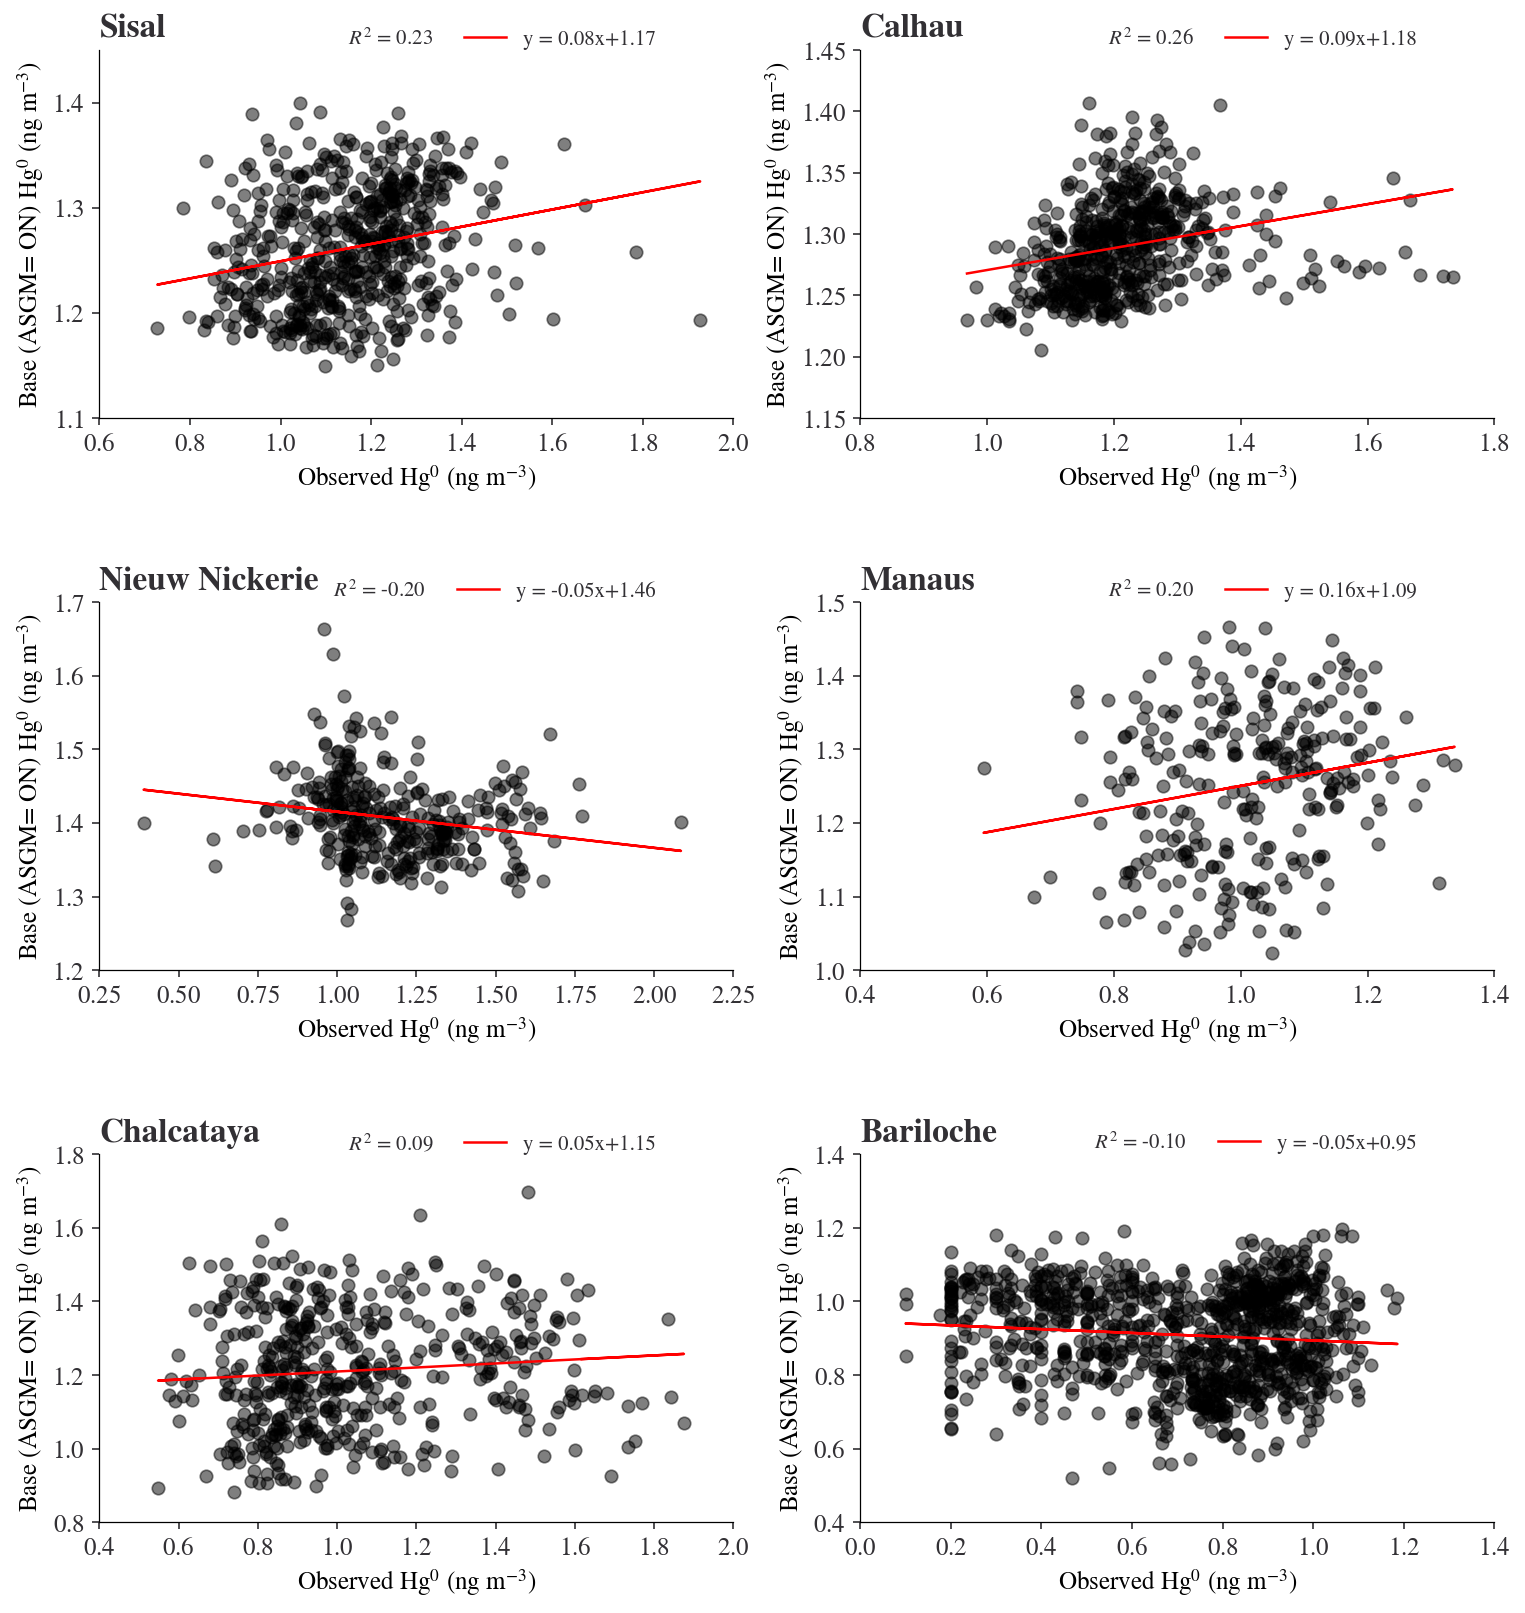

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(12,13),gridspec_kw={'wspace':0.2,'hspace':0.5})#'width_ratios':[3, 2],
position = {'BAR':[2,1],'CHC':[2,0],'MAN':[1,1],'NIK':[1,0], 'CAL':[0,1], 'SIS':[0,0]} # exclude bariloche 'BAR':[2,1],
lines = []
labels = []
for gsite in position.keys():
    scatter_plot_data(gsite)
  
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    labels.extend(Label)

from collections import OrderedDict
#fig.delaxes(axes[1][1])
# by_label = OrderedDict(zip(labels, lines))
# ulabels=['Observations','Base (ASGM= ON)','ASGM contribution']
# ulines=[by_label[ulabels[0]],by_label[ulabels[1]],by_label[ulabels[2]]]
# fig.legend(ulines, ulabels,frameon=False,  bbox_to_anchor=(0.7, 0.25))#,ncol=6
name='gmos_sites_scatter.pdf'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/GMOS_Sites/'+name
fig.savefig(savepath,bbox_inches='tight')
plt.show()

# Create figure with time series plots

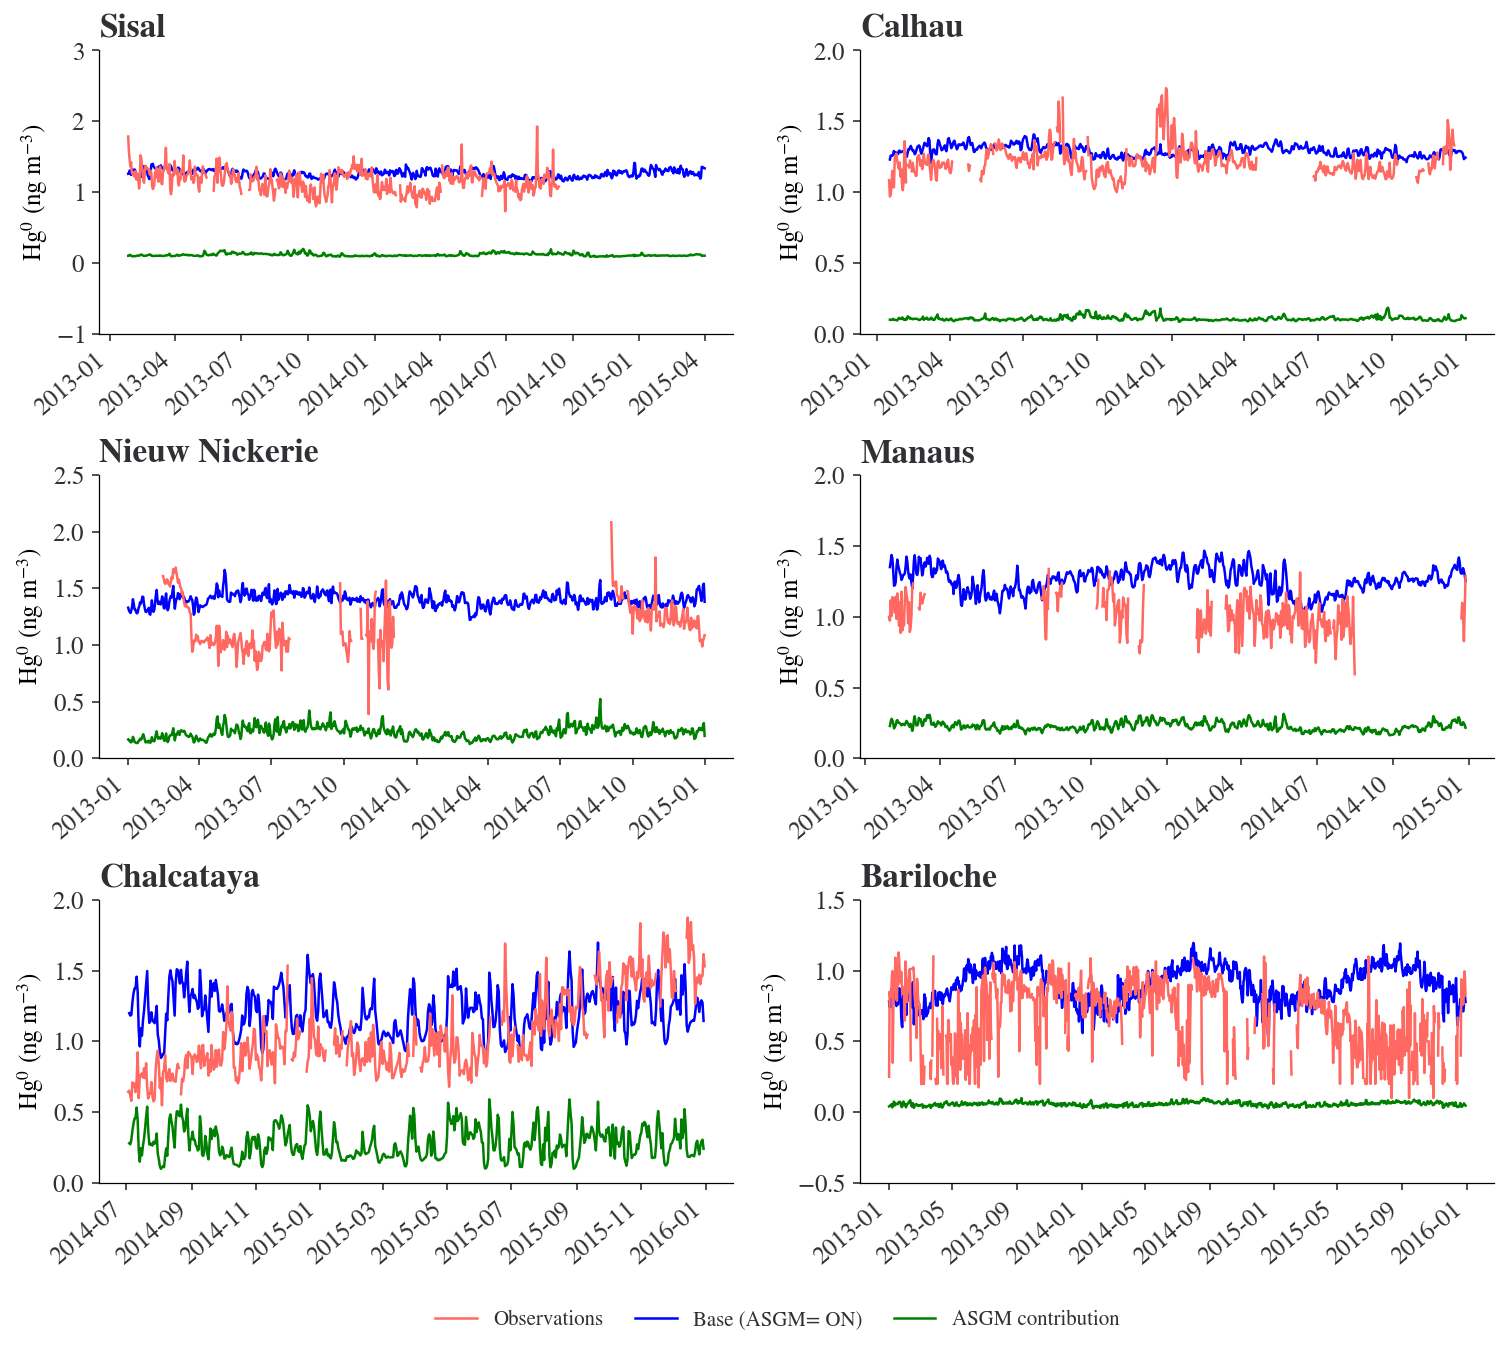

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(12,10),gridspec_kw={'wspace':0.2,'hspace':0.5})#'width_ratios':[3, 2],
position = {'BAR':[2,1],'CHC':[2,0],'MAN':[1,1],'NIK':[1,0], 'CAL':[0,1], 'SIS':[0,0]} #
lines = []
labels = []
for gsite in position.keys():
    plot_data(gsite)
  
for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    # print(Label)
    lines.extend(Line)
    labels.extend(Label)

from collections import OrderedDict
#fig.delaxes(axes[1][1])
by_label = OrderedDict(zip(labels, lines))
ulabels=['Observations','Base (ASGM= ON)','ASGM contribution']
ulines=[by_label[ulabels[0]],by_label[ulabels[1]],by_label[ulabels[2]]]
fig.legend(ulines, ulabels,frameon=False,  bbox_to_anchor=(0.7, 0.05),ncol=3)#,ncol=6
name='GMOS_Sites.pdf'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/GMOS_Sites/'+name
fig.savefig(savepath,bbox_inches='tight')
plt.show()

In [ ]:

def get_year_average(site):#BAR,CAL,CST, MAN,NIK, SIS, CHC
    
    fname={'CAL':'Calhau','CST':'Celestun', 'MAN':'Manaus','NIK':'Nieuw Nickerie','SIS':'Sisal', 'CHC':'Chalcataya','BAR':'Bariloche'}
    if site=='CHC':
        start_dt    = '2014-07-03'
        end_dt      = '2015-07-03'
    else:
        start_dt= '2013-01-01'
        end_dt  = '2014-01-01'
    obs, model, asgm        =prep_plot(site)
    df_combined             =model.to_frame()
    df_combined.columns     =['model']
    df_combined['obs']      =obs
    df_combined['asgm']     =asgm
    df_combined             =df_combined

    obs_mean=df_combined['obs'].mean()
    obs_std=df_combined['obs'].std()
    model_mean=df_combined['model'].mean()
    model_std=df_combined['model'].std()
    asgm_mean=df_combined['asgm'].mean()
    asgm_std=df_combined['asgm'].std()

    return fname[site],obs_mean,obs_std, model_mean,model_std,asgm_mean,asgm_std
   


In [ ]:
obs, model, asgm =prep_plot('CHC')
df_combined =model.to_frame().loc['2013-01-01':'2014-01-01']
df_combined.columns=['model']
df_combined['obs']=obs.loc['2013-01-01':'2014-01-01']
df_combined['asgm']=asgm.loc['2013-01-01':'2014-01-01']
# df_combined             =df_combined.dropna()

# obs_mean=df_combined['obs'].mean()
# obs_std=df_combined['obs'].std()
# model_mean=df_combined['model'].mean()
# model_std=df_combined['model'].std()
# asgm_mean=df_combined['asgm'].mean()
# asgm_std=df_combined['asgm'].std()
# print(obs_mean,obs_std, model_mean,model_std,asgm_mean,asgm_std)
print(df_combined)


Empty DataFrame
Columns: [model, obs, asgm]
Index: []


In [ ]:

import seaborn as sns


In [ ]:
fname={'SIS':'Sisal','CAL':'Calhau','NIK':'Nieuw Nickerie', 'MAN':'Manaus', 'CHC':'Chalcataya','BAR':'Bariloche'}
my_mmeans={}
for site in fname.keys():
    name,obs_mean,obs_std, model_mean,model_std,asgm_mean,asgm_std =get_year_average(site)
    my_mmeans[name] ={'obs_mean':obs_mean,'obs_std':obs_std,'model_mean':model_mean,'model_std':model_std,'asgm_mean':asgm_mean,'asgm_std':asgm_std}
my_mmeans

{'Sisal': {'obs_mean': 1.1510124535518793,
  'obs_std': 0.15401277958840612,
  'model_mean': 1.2618473768234253,
  'model_std': 0.05430776998400688,
  'asgm_mean': 0.1136363223195076,
  'asgm_std': 0.01981852389872074},
 'Calhau': {'obs_mean': 1.2157904800372292,
  'obs_std': 0.10622612842963106,
  'model_mean': 1.292123556137085,
  'model_std': 0.03637927398085594,
  'asgm_mean': 0.10614707320928574,
  'asgm_std': 0.014656919986009598},
 'Nieuw Nickerie': {'obs_mean': 1.170004180721623,
  'obs_std': 0.2189244797641867,
  'model_mean': 1.4068886041641235,
  'model_std': 0.0622156597673893,
  'asgm_mean': 0.22945739328861237,
  'asgm_std': 0.06705474108457565},
 'Manaus': {'obs_mean': 1.0087131359761168,
  'obs_std': 0.1281997058101155,
  'model_mean': 1.2607338428497314,
  'model_std': 0.09139225631952286,
  'asgm_mean': 0.22662697732448578,
  'asgm_std': 0.030073760077357292},
 'Chalcataya': {'obs_mean': 1.039719428043838,
  'obs_std': 0.2693543038617469,
  'model_mean': 1.21377205848

In [ ]:
df_site_means=pd.DataFrame(my_mmeans)
df_site_means

,Sisal,Calhau,Nieuw Nickerie,Manaus,Chalcataya,Bariloche
obs_mean,1.151012,1.215790,1.170004,1.008713,1.039719,0.708911
obs_std,0.154013,0.106226,0.218924,0.128200,0.269354,0.244201
model_mean,1.261847,1.292124,1.406889,1.260734,1.213772,0.899941
model_std,0.054308,0.036379,0.062216,0.091392,0.155930,0.126619
asgm_mean,0.113636,0.106147,0.229457,0.226627,0.283661,0.058192
asgm_std,0.019819,0.014657,0.067055,0.030074,0.109439,0.013240


In [ ]:
for site in df_site_means.columns:
    obs_mean=df_site_means[site]['obs_mean']
    model_mean=df_site_means[site]['model_mean']
    #find percentage of the models overprediction of the observations
    perc_overpred=100*(model_mean-obs_mean)/obs_mean
    print(site,perc_overpred)

#df_site_means

Sisal 9.62934179639181
Calhau 6.278472923847726
Nieuw Nickerie 20.24645957216985
Manaus 24.984378401074153
Chalcataya 16.74034607303326
Bariloche 26.94698392132465


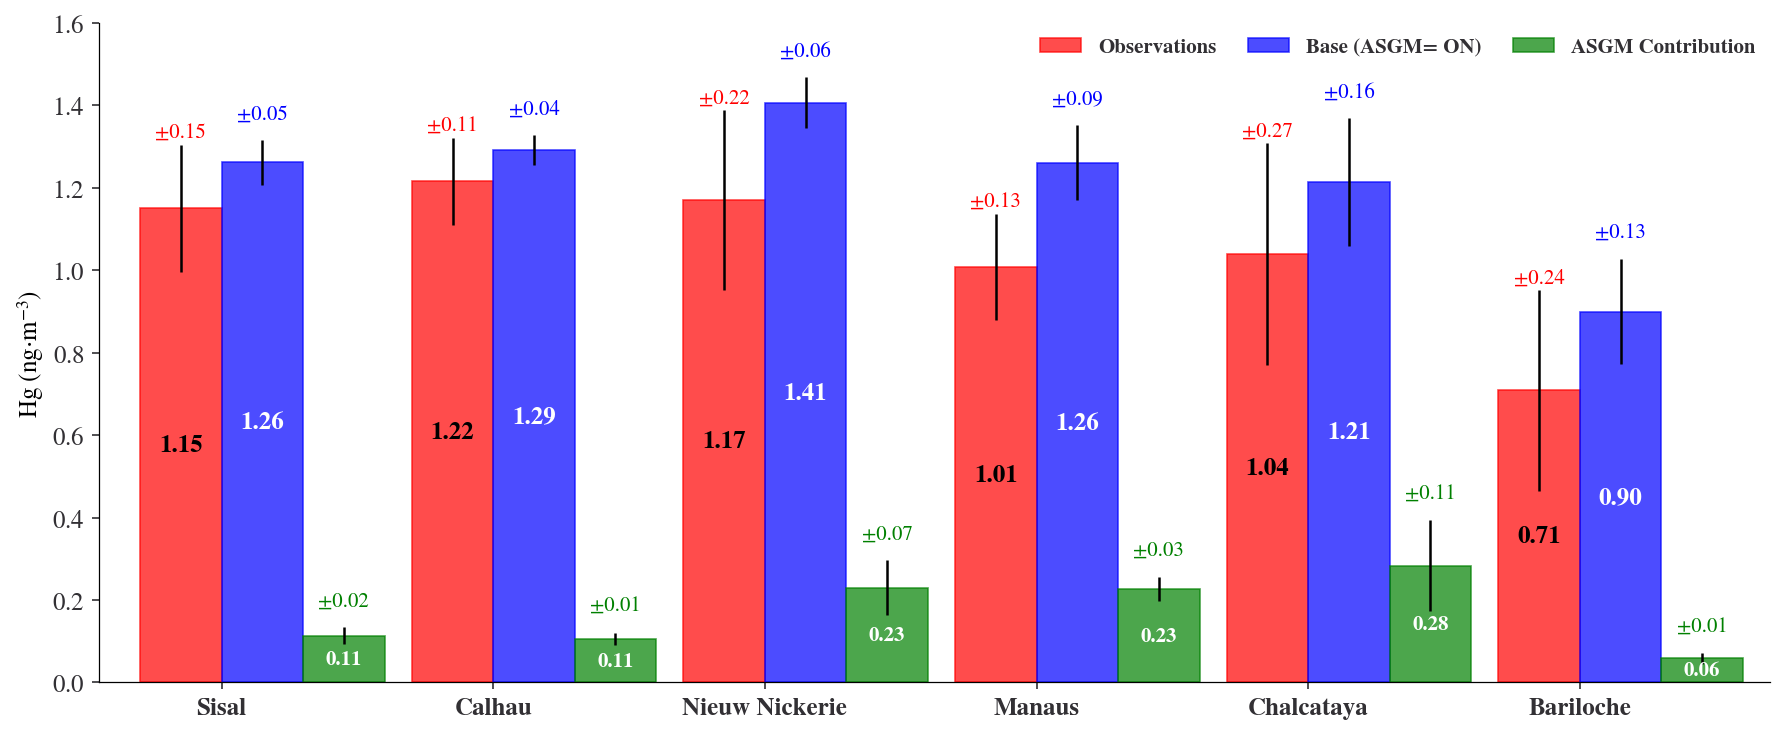

In [ ]:
labels = list(my_mmeans.keys())
obs_means = [my_mmeans[labels[0]]['obs_mean'],my_mmeans[labels[1]]['obs_mean'],my_mmeans[labels[2]]['obs_mean'],my_mmeans[labels[3]]['obs_mean'],my_mmeans[labels[4]]['obs_mean'],my_mmeans[labels[5]]['obs_mean']]
obs_stds = [my_mmeans[labels[0]]['obs_std'],my_mmeans[labels[1]]['obs_std'],my_mmeans[labels[2]]['obs_std'],my_mmeans[labels[3]]['obs_std'],my_mmeans[labels[4]]['obs_std'],my_mmeans[labels[5]]['obs_std']]
model_means =[my_mmeans[labels[0]]['model_mean'],my_mmeans[labels[1]]['model_mean'],my_mmeans[labels[2]]['model_mean'],my_mmeans[labels[3]]['model_mean'],my_mmeans[labels[4]]['model_mean'],my_mmeans[labels[5]]['model_mean']]
model_stds =[my_mmeans[labels[0]]['model_std'],my_mmeans[labels[1]]['model_std'],my_mmeans[labels[2]]['model_std'],my_mmeans[labels[3]]['model_std'],my_mmeans[labels[4]]['model_std'], my_mmeans[labels[5]]['model_std']]
asgm_means = [my_mmeans[labels[0]]['asgm_mean'],my_mmeans[labels[1]]['asgm_mean'],my_mmeans[labels[2]]['asgm_mean'],my_mmeans[labels[3]]['asgm_mean'],my_mmeans[labels[4]]['asgm_mean'],my_mmeans[labels[5]]['asgm_mean']]
asgm_stds = [my_mmeans[labels[0]]['asgm_std'],my_mmeans[labels[1]]['asgm_std'],my_mmeans[labels[2]]['asgm_std'],my_mmeans[labels[3]]['asgm_std'],my_mmeans[labels[4]]['asgm_std'],my_mmeans[labels[5]]['asgm_std']]


x = np.arange(len(labels))
width = 0.3
legend_properties = {'weight':'bold'}

fig=plt.figure(figsize=(12,5))

#plt.grid(True, which='both', axis='y', alpha=0.5, linewidth=0.5)
obs_bar=plt.bar((x/3)+width/3, obs_means, width/3,yerr=obs_stds, label='Observations', color='red', edgecolor='red',alpha=0.7)
model_bar=plt.bar((x/3)+(width*2)/3, model_means, width/3,yerr=model_stds, label='Base (ASGM= ON)', color='blue', edgecolor='blue',alpha=0.7)   
asgm_bar=plt.bar((x/3)+width, asgm_means, width/3,yerr=asgm_stds, label='ASGM Contribution', color='green', edgecolor='green',alpha=0.7)#,capsize=6
# plt.xticks(x+width/2, labels)
plt.legend(loc='upper right', frameon=False,ncol=3,prop=legend_properties)
plt.ylabel('Hg (ng$\cdot$m$^{-3}$)')
#plt.xlabel('Site')
plt.bar_label(obs_bar,labels=['±%.2f' % e for e in obs_stds ],padding=1, color='r', fontsize=10)
plt.bar_label(obs_bar,label_type='center',fmt='%.2f', color='k',fontsize=12,fontweight='bold')
plt.bar_label(model_bar,labels=['±%.2f' % e for e in model_stds ],padding=8, color='b', fontsize=10)
plt.bar_label(model_bar,label_type='center',fmt='%.2f',color='w', fontsize=12,fontweight='bold')
plt.bar_label(asgm_bar,labels=['±%.2f' % e for e in asgm_stds ],padding=8, color='g', fontsize=10)
plt.bar_label(asgm_bar,label_type='center',fmt='%.2f', color='w',fontsize=10,fontweight='bold')
plt.xticks((x/3)+width/2, labels,fontweight='bold')
plt.xlim([0,2.05])
#plt.title('Hg Average Concentration by Site')
plt.tight_layout()
name='gmos_sites_stats.pdf'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/GMOS_Sites/'+name
fig.savefig(savepath,bbox_inches='tight')
plt.show()


In [ ]:
print(asgm_bar)

<BarContainer object of 3 artists>


In [ ]:
df = sns.load_dataset('tips')
df  
# perform groupby
# df = df.groupby(['size', 'day']).agg(mean_total_bill=("total_bill", 'mean'))
# df = df.reset_index()
  
# # plot barplot
# sb.barplot(x="size",
#            y="mean_total_bill",
#            hue="day",
#            data=df)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
ob_model_statistics.T.reset_index().groupby('index').mean()

,obs_mean,obs_std,model_mean,model_std,asgm_mean,asgm_std
index,,,,,,
Calhau,1.215790,0.106226,1.289975,0.036040,0.106686,0.015250
Chalcataya,1.039719,0.269354,1.211722,0.157748,0.281271,0.110272
Manaus,1.182746,0.317864,1.252606,0.103452,0.227291,0.030982
Niew Nickerie,1.170004,0.218924,1.406854,0.054354,0.236920,0.044799
Sisal,1.151012,0.154013,1.261533,0.054721,0.116050,0.020704


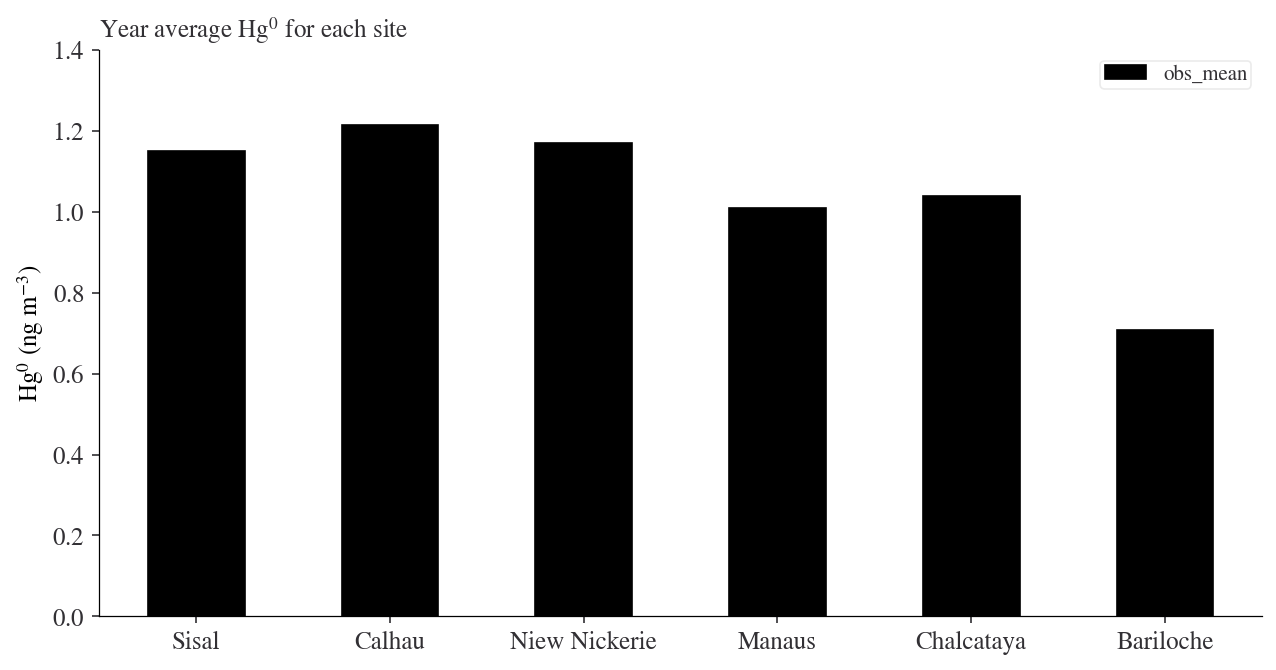

In [ ]:
df_means=pd.DataFrame.from_dict(my_mmeans,orient='index').loc[:,['obs_mean']]
# df_means.sort_values(by='Hg_mean',ascending=False,inplace=True)
df_means.plot(kind='bar',color='k',figsize=(10,5))
plt.ylabel('Hg$^0$ (ng m$^{-3}$)')
plt.xlabel('',fontsize=12),plt.xticks(rotation=0),plt.title('Year average Hg$^0$ for each site',fontsize=12)
plt.show()

In [ ]:
df_means

,obs_mean
Sisal,1.151012
Calhau,1.215790
Niew Nickerie,1.170004
Manaus,1.008713
Chalcataya,1.039719
Bariloche,0.708911


In [ ]:
df_means.to_csv('/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/JPnotebooks/year_average_Hg_0.csv')

# Calculate different metrics

In [ ]:
Sites_ASGM={}
#Sites_OB={}
fname={'CAL':'Calhau','CST':'Celestun', 'MAN':'Manaus','NIK':'Niew Nickerie','SIS':'Sisal', 'CHC':'Chalcataya'}
for gsite in position.keys():
    if gsite=='CHC':
        start_dt= '2014-07-02'
        end_dt= '2015-07-02'
    else:
        start_dt='2013-01-01'
        end_dt= '2014-01-01'
    obs, model, asgm =prep_plot(gsite)
    model=model.to_frame().loc[start_dt:end_dt]
    asgm=asgm.to_frame().loc[start_dt:end_dt]
    obs=obs.loc[start_dt:end_dt]
    #obs, model, asgm =prep_plot(gsite)
    # vertconcat=pd.concat([obs, model, asgm], axis=1)
    # vertconcat.columns=['Observations','Reference Simulation','ASGM contribution']
    asgm_summary=asgm.describe()
    asgm_summary.columns=[fname[gsite]+' ASGM Contribution']

    model_summary=model.describe()
    model_summary.columns=[fname[gsite]+' Model']

    obs_summary=obs.describe()
    obs_summary.columns=[fname[gsite]+' Observations']
    summaries=pd.concat([obs_summary,model_summary,asgm_summary], axis=1)
    Sites_ASGM[gsite]=summaries
    #print(f"\n {gsite} \n {summary}")
    ##BAR,CAL,CST, MAN,NIK, SIS, CHC


KeyboardInterrupt: 

In [ ]:
def site_metrics(gsite):
    if gsite=='CHC':
        start_dt= '2014-07-02'
        end_dt= '2015-07-02'
    else:
        start_dt='2013-01-01'
        end_dt= '2014-01-01'
    obs, model, asgm =prep_plot(gsite)
    model=model.to_frame().loc[start_dt:end_dt]
    asgm=asgm.to_frame().loc[start_dt:end_dt]
    obs=obs.loc[start_dt:end_dt]
    #obs, model, asgm =prep_plot(gsite)
    # vertconcat=pd.concat([obs, model, asgm], axis=1)
    # vertconcat.columns=['Observations','Reference Simulation','ASGM contribution']
    asgm_summary=asgm.describe()
    asgm_summary.columns=[fname[gsite]+' ASGM Contribution']

    model_summary=model.describe()
    model_summary.columns=[fname[gsite]+' Model']

    obs_summary=obs.describe()
    obs_summary.columns=[fname[gsite]+' Observations']
    summaries=pd.concat([obs_summary,model_summary,asgm_summary], axis=1)
    return summaries, obs, model, asgm

In [ ]:
summaries, obs, model, asgm =site_metrics('CHC')
obs

,value
2014-07-03,0.644308
2014-07-04,0.651114
2014-07-05,0.617688
2014-07-06,0.579989
2014-07-07,0.710160
...,...
2015-06-28,1.107000
2015-06-29,0.859547
2015-06-30,0.849968
2015-07-01,1.048141


In [ ]:
summaries

,Chalcataya Observations,Chalcataya Model,Chalcataya ASGM Contribution
count,332.000000,364.000000,364.000000
mean,0.902002,1.202751,0.281843
std,0.155164,0.157341,0.112463
min,0.548148,0.883527,0.099652
25%,0.802995,1.077360,0.192150
50%,0.886260,1.188775,0.260321
75%,0.979953,1.328593,0.361931
max,1.691778,1.611658,0.591263


In [ ]:
Sites_ASGM

{'CAL':        Calhau Observations  Calhau Model  Calhau ASGM Contribution
 count           309.000000    350.000000                350.000000
 mean              1.226165      1.300534                  0.108837
 std               0.123059      0.039291                  0.016211
 min               0.968290      1.205141                  0.087083
 25%               1.157420      1.267608                  0.097962
 50%               1.214820      1.302800                  0.104073
 75%               1.267208      1.329503                  0.112948
 max               1.734066      1.406832                  0.177446,
 'MAN':        Manaus Observations  Manaus Model  Manaus ASGM Contribution
 count           100.000000    339.000000                339.000000
 mean              1.494629      1.268049                  0.232015
 std               0.314389      0.086574                  0.027691
 min               0.876571      1.024156                  0.169104
 25%               1.269611      

In [ ]:
vertconcat=pd.concat([Sites_ASGM['CHC'],Sites_ASGM['SIS'],Sites_ASGM['NIK'],Sites_ASGM['CAL'],Sites_ASGM['MAN']], axis=1)
print(vertconcat.T[['count', 'mean', 'std', 'min']])


#vertconcat.T.columns

                                 count      mean       std       min
Chalcataya Observations          332.0  0.902002  0.155164  0.548148
Chalcataya Model                 364.0  1.202751  0.157341  0.883527
Chalcataya ASGM Contribution     364.0  0.281843  0.112463  0.099652
Sisal Observations               320.0  1.190081  0.148687  0.798284
Sisal Model                      341.0  1.269868  0.052208  1.164058
Sisal ASGM Contribution          341.0  0.115492  0.021161  0.085980
Niew Nickerie Observations       215.0  1.111905  0.225559  0.389664
Niew Nickerie Model              366.0  1.411384  0.059228  1.267713
Niew Nickerie ASGM Contribution  366.0  0.235136  0.055454  0.134635
Calhau Observations              309.0  1.226165  0.123059  0.968290
Calhau Model                     350.0  1.300534  0.039291  1.205141
Calhau ASGM Contribution         350.0  0.108837  0.016211  0.087083
Manaus Observations              100.0  1.494629  0.314389  0.876571
Manaus Model                     3

In [ ]:
obs, model, asgm =prep_plot('CHC')
asgm_summary=asgm.describe()
# asgm_summary.columns=[fname[gsite]+' ASGM Contribution']

model_summary=model.describe()
# model_summary.columns=[fname[gsite]+' Model']

obs_summary=obs.describe()
# obs_summary.columns=[fname[gsite]+' Observations']
# summaries=pd.concat([obs_summary,model_summary,asgm_summary], axis=1)
# Sites_ASGM[gsite]=summaries
#     #print(f"\n {gsite} \n {summary}")

In [ ]:
!pwd

/net/fs03/d0/arifein/python


In [ ]:
start_dt= '2014-07-02'
end_dt= '2015-07-02'
obs_vs_model=pd.concat([obs, model, asgm], axis=1)
obs_vs_model.columns=['Observations','Reference Simulation','ASGM contribution']
obs_vs_model.loc[start_dt:end_dt]

,Observations,Reference Simulation,ASGM contribution
2014-07-04,0.651114,1.199622,0.280512
2014-07-05,0.617688,1.182552,0.273120
2014-07-06,0.579989,1.188133,0.305283
2014-07-07,0.710160,1.275346,0.369804
2014-07-08,0.678296,1.337291,0.418008
...,...,...,...
2015-06-30,0.849968,1.076604,0.230013
2015-07-01,1.048141,1.227361,0.354582
2015-07-02,0.895688,1.404276,0.501836
2015-07-03,1.009141,1.329316,0.416694


In [ ]:
def nrmse_func(obs, pred, type = "sd"):
    squared_sums =np.sum((obs - pred)**2)
    mse = squared_sums/len(obs)
    rmse = np.sqrt(mse)
    if type == "sd":
        nrmse = rmse/np.std(obs)
    elif type == "mean":
        nrmse = rmse/np.mean(obs)
        
    elif type == "maxmin":
        nrmse = rmse/(max(obs) - min(obs))
    elif type == "iqr":
        nrmse = rmse/(np.percentile(obs, 0.75) - np.percentile(obs, 0.25))
    #if (!type %in% c("mean", "sd", "maxmin", "iq")) message("Wrong type!")
    nrmse = round(nrmse, 3)
    return nrmse
    

In [ ]:
import seaborn as sns # For pairplots and heatmaps
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)
def display_corr_pairs(df,color="cyan"):
    s = set_title = np.vectorize(lambda ax,r,rho: ax.title.set_text("r = " + 
                                        "{:.2f}".format(r) + 
                                        '\n $\\rho$ = ' + 
                                        "{:.2f}".format(rho)) if ax!=None else None
                            )      

    r = display_correlation(df)
    rho = df.corr(method="pearson")
    g = sns.PairGrid(df,corner=True)
    g.map_diag(plt.hist,color="grey")
    g.map_lower(sns.scatterplot,color="magenta")
    set_title(g.axes,r,rho)
    plt.subplots_adjust(hspace = 0.6)
    name='GMOS_Sites'
    savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/GMOS_Sites/'+name+'.pdf'
    fig.savefig(savepath,bbox_inches='tight')
    plt.show()
    plt.show()

Calhau: 0.107


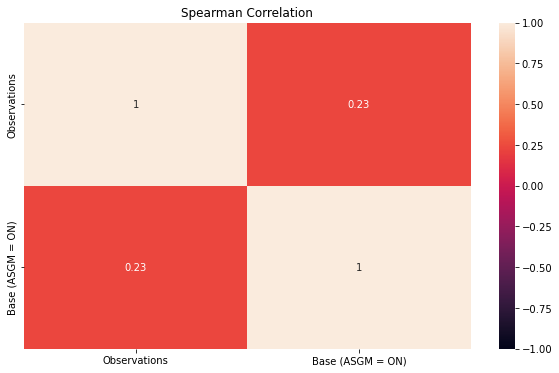

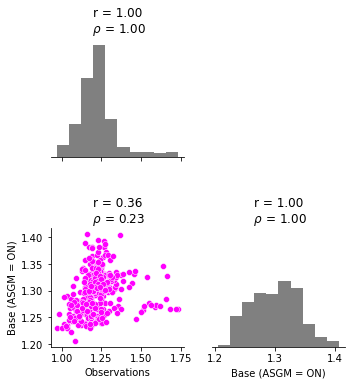

Manaus: 0.141


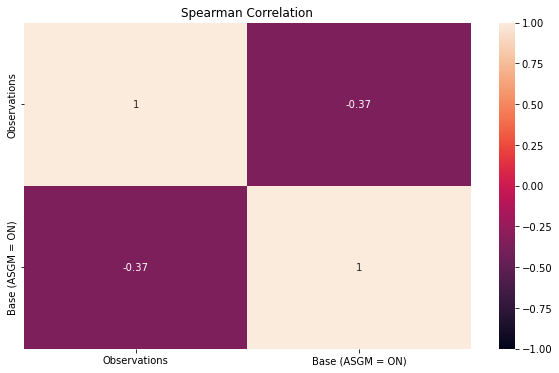

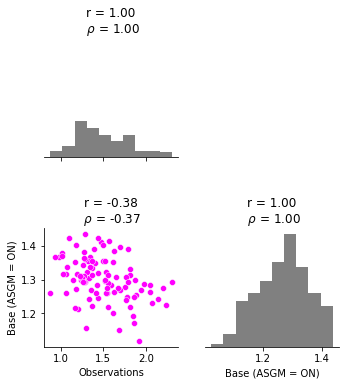

Niew Nickerie: 0.267


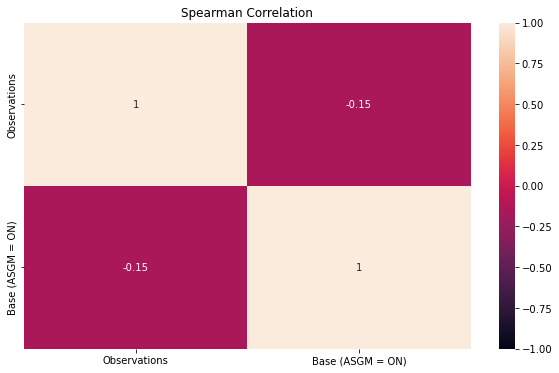

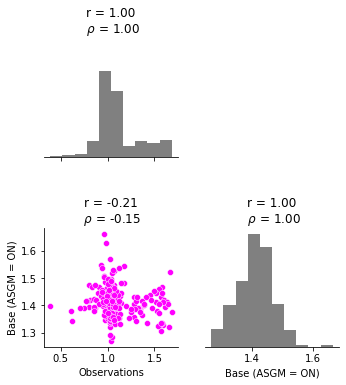

Sisal: 0.132


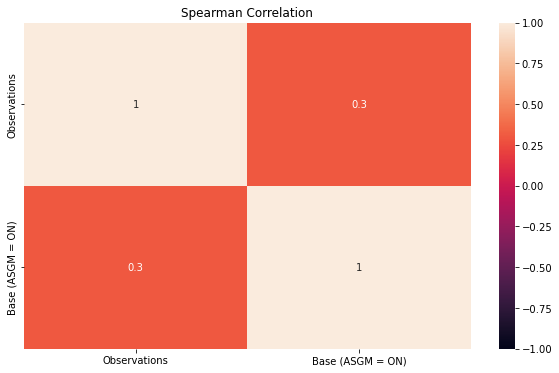

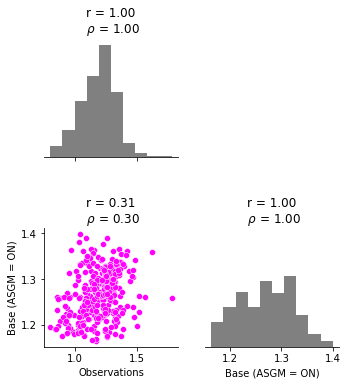

Chalcataya: 0.394


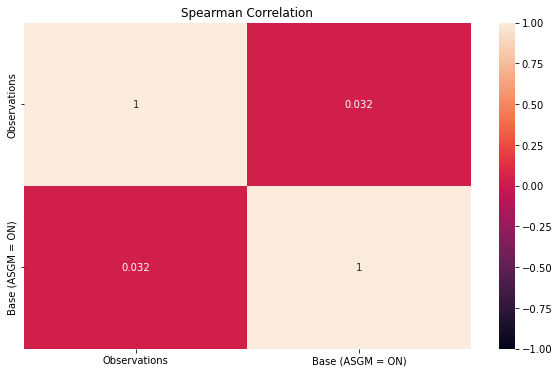

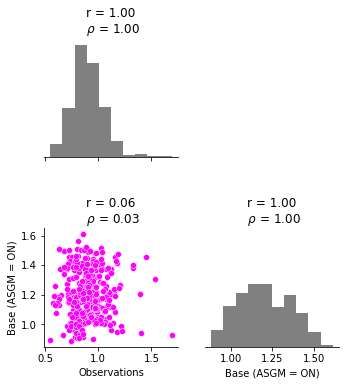

In [ ]:
for gsite in position.keys():
    if gsite=='CHC':
        start_dt= '2014-07-04'
        end_dt= '2015-07-04'
    else:
        start_dt='2013-01-01'
        end_dt= '2014-01-01'
    obs, model, asgm =prep_plot(gsite)
    model=model.to_frame().loc[start_dt:end_dt]
    asgm=asgm.to_frame().loc[start_dt:end_dt]
    obs=obs.loc[start_dt:end_dt]
    obs_vs_model=pd.concat([obs, model], axis=1)
    obs_vs_model.columns=['Observations','Base (ASGM = ON)']
    obs_vs_model.loc[start_dt:end_dt]
    NRMSE=nrmse_func(obs_vs_model['Observations'],obs_vs_model['Base (ASGM = ON)'],type = "mean")
    
    print(f"{fname[gsite]}: {NRMSE}")
    
    # display_corr_pairs(obs_vs_model)
    

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=062c0bf9-42c4-47d5-bc83-fb7cbde5be86' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>